Question 3

In [12]:
from math import e
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
from scipy.ndimage import measurements as me

#fix this to be more like my stuff, not just julias

n = 32
space = np.zeros((n,n))
probability = np.zeros((n,n))
available_locations = []
for i in range(space.shape[0]):
    for j in range(space.shape[1]):
        probability_of_spark = e**((-i+1)/(n/10))*e**((-j+1)/(n/10)) 
        probability[i][j] = probability_of_spark
        available_locations.append([i,j])
all_tree_yields = []
tree_spots = []
list_of_trees_added = []
d = n*n
grid_yield_list = []
density = []
forest = space
for tree_placement in range(n*n):
    dict = {}
    decider = []
    choice_list = []
    for num in range(d):
        if (len(available_locations)>=2):
            random_choice = random.choice(available_locations)
            while random_choice in choice_list:
                random_choice = random.choice(available_locations)
            choice_list.append(random.choice(available_locations))
            holder_list_of_trees_added = list_of_trees_added
            holder_list_of_trees_added.append(random_choice)
            spark_probability = probability[random_choice[0]][random_choice[1]]
            forest_holder = forest
            forest_holder[random_choice[0],random_choice[1]] = 1
            labeled_matrix,number_of_clusters = me.label(forest_holder)
            freq = {}
            burn_prob = {}
            total_danger = {}   
            for x in range(1,labeled_matrix.shape[0]):
                for y in range(1,labeled_matrix.shape[1]):
                    if(labeled_matrix[x][y]!=0):
                        if labeled_matrix[x][y] in freq:
                            burn_prob[labeled_matrix[x][y]] += probability[x][y]
                            freq[labeled_matrix[x][y]] += 1
                        else:
                            burn_prob[labeled_matrix[x][y]] = probability[x][y]
                            freq[labeled_matrix[x][y]]=1
                        total_danger[labeled_matrix[x][y]] = burn_prob[labeled_matrix[x][y]] * freq[labeled_matrix[x][y]]
            trees_lost = sum(total_danger.values())
            total_trees = len(list_of_trees_added)
            if (trees_lost>total_trees):
                grid_yield = 0
            else: 
                grid_yield = total_trees - trees_lost
            decider.append(grid_yield)
        else: break
    if(len(available_locations)<=2):
        break
    #print(choice_list)   
    #print(decider)
    max_grid_yield_selection = choice_list[decider.index(max(decider))]
    #print(max_grid_yield_selection)
    
    list_of_trees_added.append(max_grid_yield_selection)
    spark_probability = probability[max_grid_yield_selection[0]][max_grid_yield_selection[1]]
    forest = space
    forest[max_grid_yield_selection[0],max_grid_yield_selection[1]] = 1
    labeled_matrix,number_of_clusters = me.label(forest)
    
    freq = {}
    burn_prob = {}
    total_danger = {}   
    for x in range(1,labeled_matrix.shape[0]):
        for y in range(1,labeled_matrix.shape[1]):
            if(labeled_matrix[x][y]!=0):
                if labeled_matrix[x][y] in freq:
                    burn_prob[labeled_matrix[x][y]] += probability[x][y]
                    freq[labeled_matrix[x][y]] += 1
                else:
                    burn_prob[labeled_matrix[x][y]] = probability[x][y]
                    freq[labeled_matrix[x][y]]=1
                total_danger[labeled_matrix[x][y]] = burn_prob[labeled_matrix[x][y]] * freq[labeled_matrix[x][y]]
    trees_lost = sum(total_danger.values())
    total_trees = len(list_of_trees_added)
    density_single = total_trees/(n*n)
    if (density_single > 1):
        break
    density.append(density_single)

    if (trees_lost>total_trees):
        grid_yield = 0
    else: 
        grid_yield = total_trees - trees_lost
        
    grid_yield_list.append(grid_yield)
    #plt.imshow(forest,origin = 'lower')
    #plt.show()
    available_locations.remove(max_grid_yield_selection)

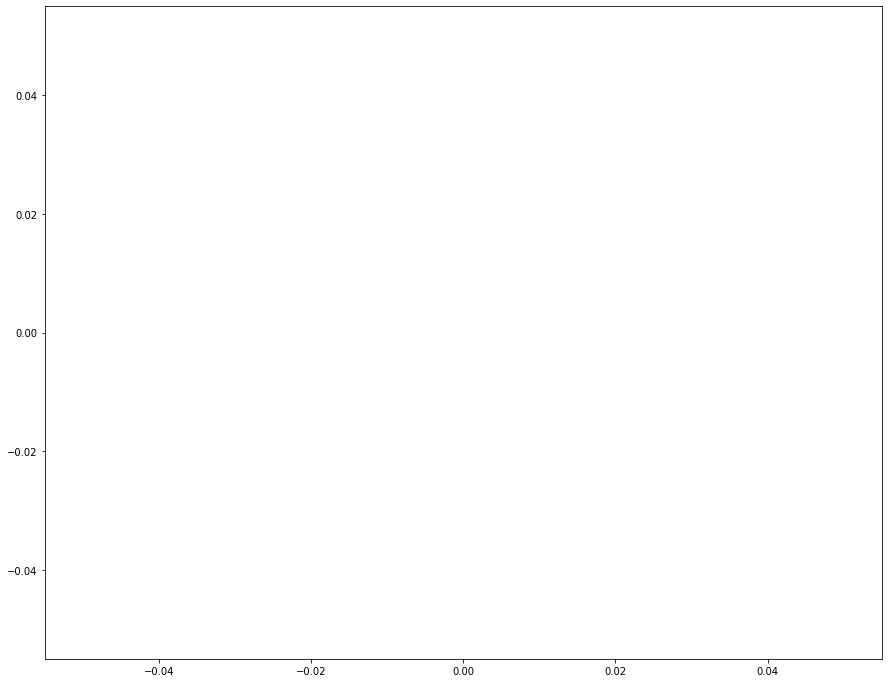

In [13]:
plt.figure(figsize = (15,12))
plt.plot(density,grid_yield_list)
plt.show()

In [14]:
max_yield = max(grid_yield_list)
print(max_yield)
index = grid_yield_list.index(max_yield)
print(index)

ValueError: max() arg is an empty sequence

In [ ]:
new_space = np.zeros((n,n))
for x in range(index):
    coordinates = list_of_trees_added[x]
    new_space[coordinates[0]][coordinates[1]] = 1
plt.figure(figsize = (15,12))
plt.title('D=L^2, L=32')
plt.imshow(new_space,origin = 'lower')
plt.show()
